# Resampling Oil Price Timeseries Data

This week we are going to read in oil price data that was sampled at a daily interval. Next we will take this timeseries and resample it to bi-weekly and half-yearly intervals. We could also downsample or upsample to any interval we are interested in

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

Read in the excel workbook and read in the second sheet

In [2]:
oil_price = pd.read_excel(
    "eia_prices.xls",
    sheet_name="Data 1",
    header=2,
    index_col=[0],
    parse_dates=True,
).dropna()  # read EIA workbook, open sheet named Data 1 and index with dates
oil_price.head()  # quick look to make sure the data is ok, we also dropped the NaN values

,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",Europe Brent Spot Price FOB (Dollars per Barrel)
Date,,
1987-05-20,19.75,18.63
1987-05-21,19.95,18.45
1987-05-22,19.68,18.55
1987-05-26,19.35,18.63
1987-05-27,19.38,18.60


Now let's make a new `DataFrame` with an easier to call name for the WTI oil price

In [3]:
WTI = pd.DataFrame()
WTI['price'] = oil_price['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)']

To resample the WTI oil price we call the WTI `DataFrame` with the `rolling` method, and specify the interval (here `14d` is 14 days) and then we need to specify how to aggregate the values. Here we use the `mean`, `min`, and `max`.

In [4]:
biweekly_mean = WTI.rolling('14d').mean()
biweekly_min = WTI.rolling('14d').min()
biweekly_max = WTI.rolling('14d').max()

To sample at the half-year scale, we call `6M` for six months. Let's call the median price for the 6 month period with `median`

In [5]:
half_year = WTI.resample('6M').median()

Let's do a quick visual, to see how the half-yearly resample compares to the bi-weekly mean, min, and max

(733773.0, 736876.0)

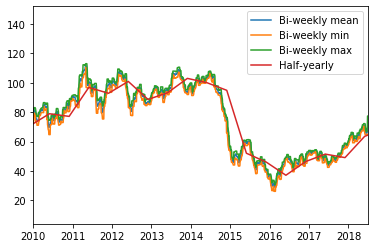

In [6]:
plt.plot(biweekly_mean, label='Bi-weekly mean')
plt.plot(biweekly_min, label='Bi-weekly min')
plt.plot(biweekly_max, label='Bi-weekly max')


plt.plot(half_year, label='Half-yearly')
plt.legend()
plt.xlim('2010-01-01','2018-07-01')

And a quick sanity check to see the structure of the data and we are good to go! We can now combine this with other datasets that have similar sample rates

In [7]:
half_year.tail()

,price
Date,
2017-05-31,51.51
2017-11-30,49.13
2018-05-31,63.60
2018-11-30,68.66
2019-05-31,51.35


This notebook is licensed as CC-BY, use and share to your hearts content.